In [1]:
import numpy as np
import pandas as pd

In [43]:
data = pd.read_csv("C:/Users/Sneha Gupta/Downloads/Global_Pollution_Analysis.csv")

In [44]:
data

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
0,Hungary,2005,272.70,124.27,51.95,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96
1,Singapore,2001,86.72,60.34,117.22,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41
2,Romania,2016,91.59,83.36,121.72,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15
3,Cook Islands,2018,280.61,67.16,93.58,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51
4,Djibouti,2008,179.16,127.53,121.55,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Latvia,2004,115.84,78.75,42.34,49503.35,81.23,4.85,17.38,4065.66,6.28,92.96,14818.18
196,Bangladesh,2002,121.82,120.97,63.95,74694.68,25.89,46.22,16.56,36905.26,15.18,114.02,59238.04
197,Korea,2011,149.73,146.92,37.04,2818.85,293.27,38.46,38.36,24700.29,14.11,183.06,28895.94
198,Vanuatu,2002,237.20,113.63,101.96,68746.82,305.61,28.82,32.17,1443.62,12.44,40.65,17068.01


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 200 non-null    object 
 1   Year                                    200 non-null    int64  
 2   Air_Pollution_Index                     200 non-null    float64
 3   Water_Pollution_Index                   200 non-null    float64
 4   Soil_Pollution_Index                    200 non-null    float64
 5   Industrial_Waste (in tons)              200 non-null    float64
 6   Energy_Recovered (in GWh)               200 non-null    float64
 7   CO2_Emissions (in MT)                   200 non-null    float64
 8   Renewable_Energy (%)                    200 non-null    float64
 9   Plastic_Waste_Produced (in tons)        200 non-null    float64
 10  Energy_Consumption_Per_Capita (in MWh)  200 non-null    float6

In [50]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['air'] = le.fit_transform(data['Air_Pollution_Index'])
data['water'] = le.fit_transform(data['Water_Pollution_Index'])
data['soil'] = le.fit_transform(data['Soil_Pollution_Index'])
data['energy'] = le.fit_transform(data['Energy_Consumption_Per_Capita (in MWh)'])

In [51]:
features = ['air','soil','water','energy']
x = data[features]
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_s = ss.fit_transform(x)

In [52]:
from sklearn.cluster import KMeans
k = 3
kmeans = KMeans(n_clusters = k, random_state = 42)
data['cluster'] = kmeans.fit_predict(x_s)

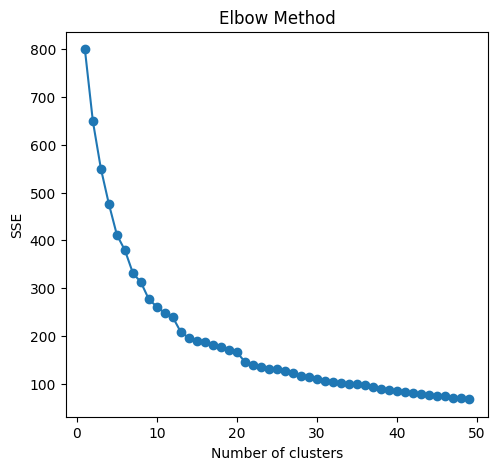

In [62]:
import matplotlib.pyplot as plt

k_range = range(1, 50)
sse = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_s)
    sse.append(kmeans.inertia_)  # Sum of squared distances
    

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')


plt.show()


In [56]:
print(data[['Country', 'cluster']])

          Country  cluster
0         Hungary        2
1       Singapore        0
2         Romania        0
3    Cook Islands        1
4        Djibouti        0
..            ...      ...
195        Latvia        0
196    Bangladesh        0
197         Korea        0
198       Vanuatu        2
199       Croatia        0

[200 rows x 2 columns]


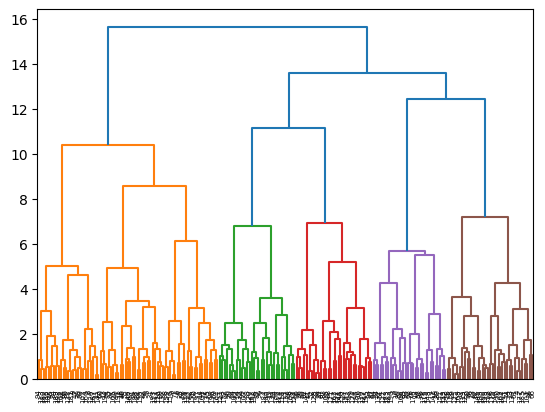

<Figure size 2000x700 with 0 Axes>

In [69]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=3, linkage='ward')
data['Cluster'] = agg.fit_predict(x_s)
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

linkage = linkage(x_s, method = 'ward', metric = 'euclidean')
dendrogram(linkage)
plt.xticks(rotation=90)
plt.figure(figsize=(20,7))
plt.tight_layout()
plt.show()

In [71]:
for c in sorted(data['Cluster'].unique()):
    members = data[data['Cluster'] == c]['Country'].tolist()
    print(f"Cluster {c}: {', '.join(members)}")

Cluster 0: Singapore, Romania, Cook Islands, Djibouti, Macedonia, Northern Mariana Islands, Slovenia, Oman, Bulgaria, Western Sahara, Bouvet Island (Bouvetoya), Costa Rica, Argentina, Mexico, Libyan Arab Jamahiriya, Bahamas, Zambia, French Guiana, Australia, Pitcairn Islands, Iran, Netherlands Antilles, Mali, India, Guernsey, Albania, Tunisia, Italy, Botswana, Jordan, Lao People's Democratic Republic, Bahrain, United Arab Emirates, Ecuador, Malta, Sweden, Austria, Bangladesh, Vietnam, Finland, Norway, Faroe Islands, Sudan, Fiji, Burundi, New Caledonia, Bhutan, Cote d'Ivoire, Guyana, Chile, Lebanon, Nicaragua, Honduras, El Salvador, Luxembourg, Indonesia, Moldova, Peru, Norfolk Island, Romania, Spain, Philippines, Western Sahara, Barbados, Croatia
Cluster 1: Hungary, Croatia, Congo, Swaziland, Sri Lanka, Ukraine, Madagascar, Thailand, Maldives, Heard Island and McDonald Islands, Togo, Mozambique, Bosnia and Herzegovina, Paraguay, Cyprus, Belize, Nigeria, Colombia, Kazakhstan, United Sta

In [15]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\Sneha Gupta\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [72]:
import tensorflow as tf 
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [73]:
X = data[['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index','Industrial_Waste (in tons)','CO2_Emissions (in MT)']]
y = data['Energy_Recovered (in GWh)']

In [74]:
X_s = ss.fit_transform(X)

In [75]:
x_train, x_test, y_train,y_test = train_test_split(X_s, y, test_size = 0.3,random_state = 42)

In [78]:
from tensorflow.keras.optimizers import Adam
model = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(x_train.shape[1],)),
    keras.layers.Dense(16, activation='sigmoid')  # Final output layer with 1 neuron
])

model.compile(optimizer=Adam(learning_rate=0.01), loss='mse', metrics=['mae'])
model.summary()


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 32)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 16)                  │             528 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 720 (2.81 KB)

 Trainable params: 720 (2.81 KB)

 Non-trainable params: 0 (0.00 B)

In [79]:
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), verbose=0)